Missing values in the dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Statistical summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    populatio

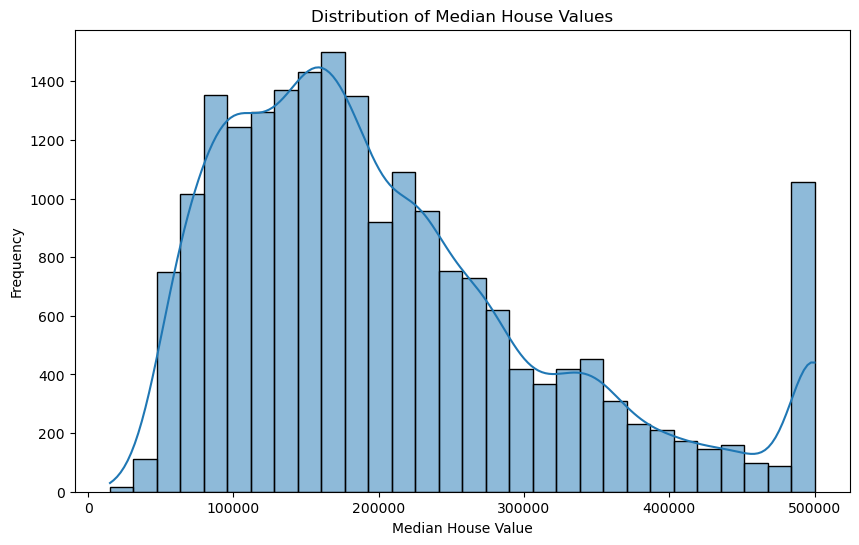

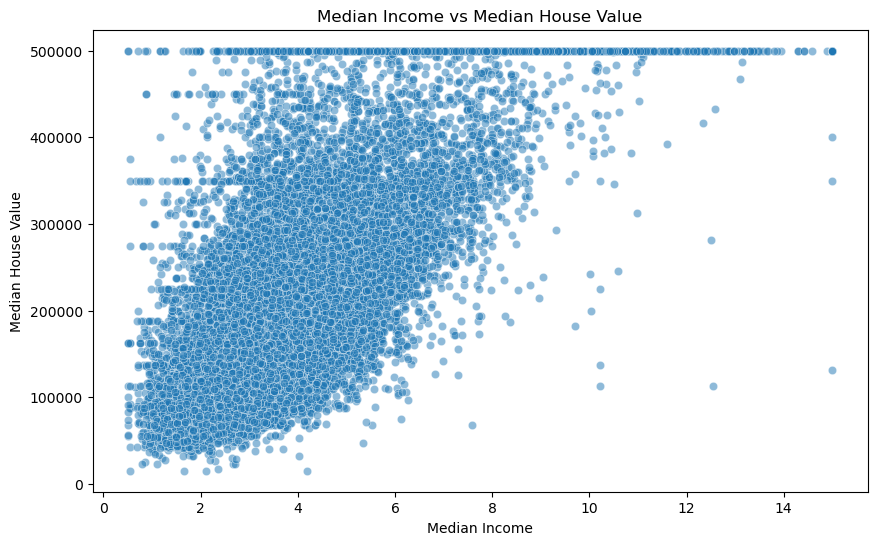

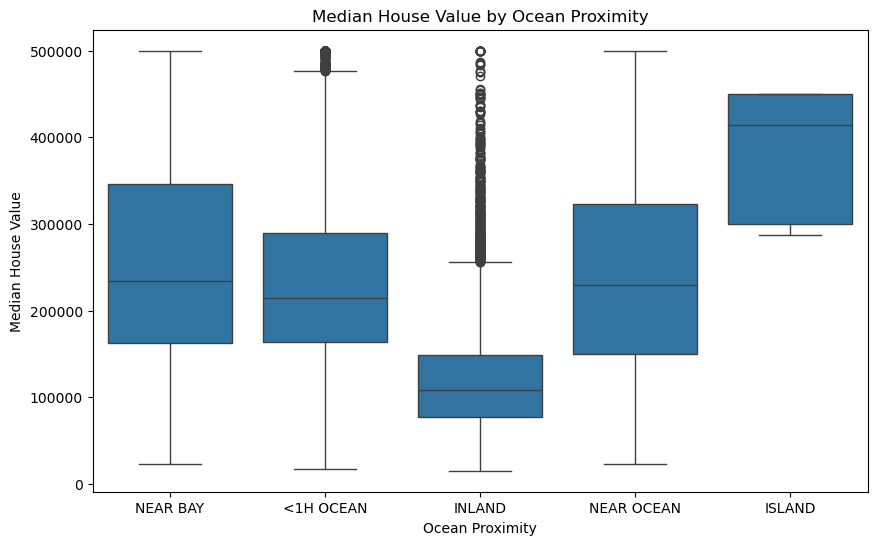

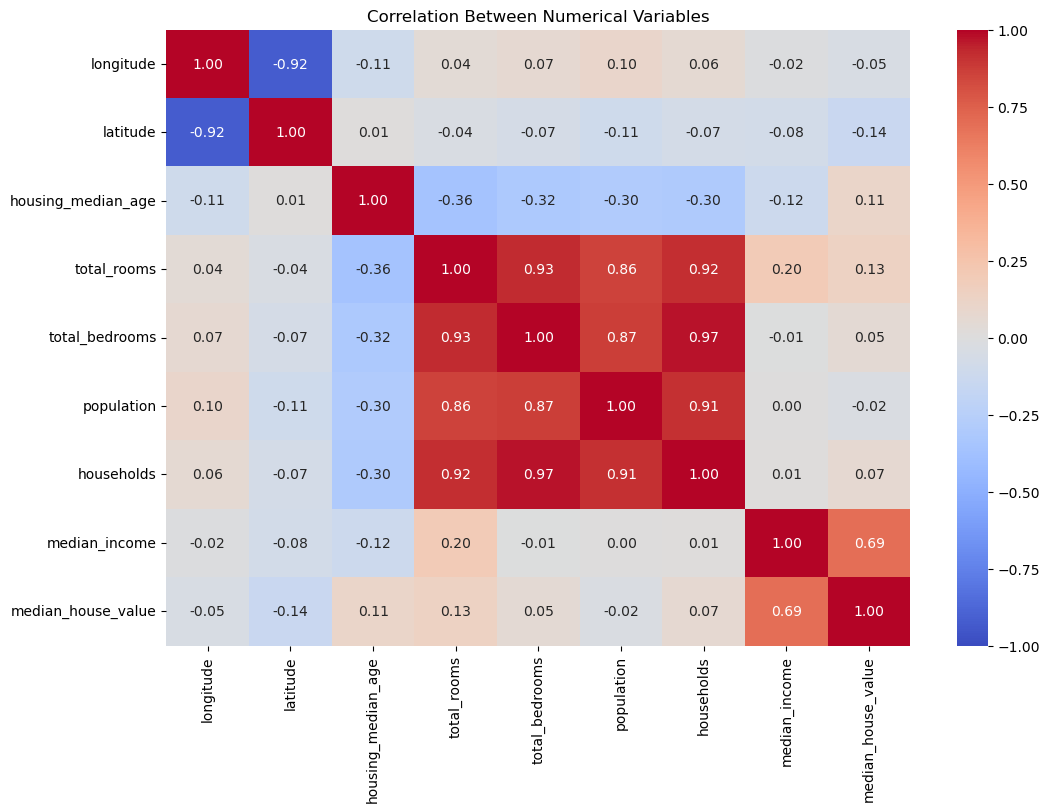


Examples of cheaper houses:
    latitude  longitude  median_income  median_house_value
22     37.84    -122.27         1.7250            113900.0
23     37.84    -122.27         2.1806             99700.0
25     37.85    -122.28         2.4038            107500.0
26     37.85    -122.28         2.4597             93800.0
27     37.85    -122.28         1.8080            105500.0

Examples of expensive houses:
   latitude  longitude  median_income  median_house_value
0     37.88    -122.23         8.3252            452600.0
1     37.86    -122.22         8.3014            358500.0
2     37.85    -122.24         7.2574            352100.0
3     37.85    -122.25         5.6431            341300.0
4     37.85    -122.25         3.8462            342200.0


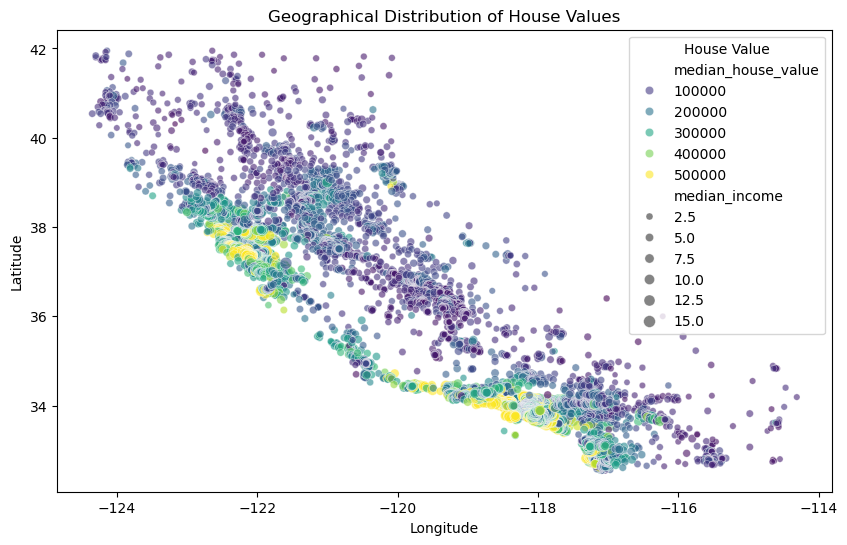


Conclusions:
Houses near the ocean and with higher median incomes tend to be more expensive.
Cheaper houses are often farther from the ocean and have lower median incomes.


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "housing.csv"  # Set the correct path to the dataset
housing_data = pd.read_csv(file_path)

# 1. Check for missing values
print("Missing values in the dataset:")
print(housing_data.isnull().sum())

# 2. Statistical summary of the dataset
print("\nStatistical summary:")
print(housing_data.describe())

# 3. Handle missing values
# Replace missing values in 'total_bedrooms' with the median value
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())

# 4. Visualizations
# a. Distribution of median house values
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['median_house_value'], kde=True, bins=30)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# b. Relationship between median income and house values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data, alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

# c. House values based on ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_data)
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

# 5. Additional analyses
# Compute the correlation matrix for numerical variables only
# Exclude non-numerical columns
numerical_data = housing_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Variables")
plt.show()

# 6. Identify cheaper and more expensive houses
# Cheaper houses (below the 25th percentile)
cheaper_houses = housing_data[housing_data['median_house_value'] < housing_data['median_house_value'].quantile(0.25)]
print("\nExamples of cheaper houses:")
print(cheaper_houses[['latitude', 'longitude', 'median_income', 'median_house_value']].head())

# Expensive houses (above the 75th percentile)
expensive_houses = housing_data[housing_data['median_house_value'] > housing_data['median_house_value'].quantile(0.75)]
print("\nExamples of expensive houses:")
print(expensive_houses[['latitude', 'longitude', 'median_income', 'median_house_value']].head())

# 7. Geographical visualization
# Visualizing house values geographically using latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='median_income',
                data=housing_data, palette='viridis', alpha=0.6)
plt.title("Geographical Distribution of House Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="House Value")
plt.show()

# Conclusion
print("\nConclusions:")
print("Houses near the ocean and with higher median incomes tend to be more expensive.")
print("Cheaper houses are often farther from the ocean and have lower median incomes.")

# 1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?
# Ja, en utmaning i kunskapskontrollen var att hantera kategoriska variabler i korrelationsmatrisen.
# Eftersom dessa variabler innehåller textdata (som "NEAR BAY") orsakade de problem vid analysen.
# Jag definierade problemet, itererade lösningar och kunde utveckla och anpassa koden.
# Detta tillvägagångssätt gav mig inte bara fungerande kod utan också en djupare förståelse
# för hur datatyper fungerar och hur de kan påverka olika analysmetoder, som korrelationsmatriser.

# 2. Vilket betyg anser du att du ska ha och varför?
# Jag har svårt att bedöma betygshöjden på min insats, men jag tycker att jag åtminstone har nått
# ett godkänt (G). Mitt mål har inte varit att "knacka kod" manuellt eller mekaniskt, utan att skapa
# en förståelse för programmeringsspråket, miljöerna och de möjligheter som finns med Python.
# Genom att ta rollen som beställare och låta ChatGPT fungera som leverantör har jag kunnat fokusera
# på problemlösning och design av lösningar, vilket jag tycker är en viktig del av lärandet.
# Jag har också tagit på mig rollen som itererare och bedömare, vilket innebar att jag analyserade,
# förbättrade och anpassade koden efter behov. Detta tillvägagångssätt har lärt mig otroligt mycket
# om både kod och strategisk problemlösning.

# 3. Något du vill lyfta fram till Antonio?
# Antonio, jag vill verkligen lyfta fram hur inspirerande din undervisning har varit!
# Du är grym på att få oss att förstå grunderna och möjligheterna i programmering.
# Jag fått en helt ny förståelse för Python och
# dess kraft, samtidigt som jag har kunnat fokusera på att designa, iterera och förbättra lösningar.
# Jag vill tacka dig för att du gör programmeringen både lärorik och rolig. Din vägledning har
# hjälpt mig att se programmering som ett verktyg för problemlösning och kreativitet.
